# What is the best neighborhood to own a rental property in New York City?
Diana H.

## Introduction

For those looking to buy a rental property, deciding where to buy is a major concern. 

"Best neighborhood" to rent out a property can be quite subjective and defined in multiple ways. I would like to define it here as a 'hot' neighborhood with lots of growth in rental prices in this past year. In other words, among similar level neighborhoods, the best neighborhood of that cluster would be the one with highest year-on-year growth in rental prices.  

A general approach:  
Neighborhoods can be clustered into similar types of neighborhoods by certain features such as subway accessibility, number of grocery stores, and number of restaurants. In a given cluster of neighborhoods, a comparison of the neighborhood's median rental price and the year-on-year change in price can be made. Thus, each cluster's neighborhood with the highest rental price and also the neighborhood with the most growth in rental prices can be identified.  




## Data

**Neighborhood shapefile from zillow:**  
https://www.zillowgroup.com/developers/api/public-data/neighborhood-boundaries/  
These shapefiles will define the neighborhood polygon.

**Neighborhood features to cluster on:**  
1) Subway accessibility: Number of entrances/exits for the subway in each neighborhood as geodata points  
https://data.cityofnewyork.us/api/geospatial/drex-xx56?method=export&format=GeoJSON  
This dataset will provide coordinates of each subway entrance/exit. The number of entrances/exits in each neighborhood shapefile can be counted.

2) Number of Grocery Store, Market, Organic grocery, Bakery, Butcher, Supermarket, Drugstore, Pharmacy in each neighborhood    
Data from foursquare. All venues in a neighborhood can be found and narrowed down to the desired venue type.

3) Number of restaurants in each neighborhood  
Data from foursquare. All venues in a neighborhood can be found and narrowed down to the desired venue type.

**Neighborhood rental price data:**  
Median Asking price for all rental properties in each neighborhood downloaded from:
https://streeteasy-market-data-download.s3.amazonaws.com/rentals/All/medianAskingRent_All.zip  
This dataset contains the Median asking rent per month from 2010-01 to 2019-12 of each neighborhood.

## Methodology

### Features of neighborhoods:

My first aim was to obtain the features that I would use to classify neighborhoods. I expected that subway accessibility, number of nearby grocery stores/supermarkets, and number of restaurants in the neighborhood would be important characteristics that one would use to choose a neighborhood in NYC to live in.  
Since I was only interested in Manhattan and Brooklyn boroughs, I narrowed down my datasets to just contain these two boroughs. 

#### Neighborhood subway exit counts
Zillow neighborhood shapefiles were used to determine the neighborhood boundaries. Within these coordinates-linked shapes, the coordinate points of each NYC subway exits/entrances are plotted and counted. 

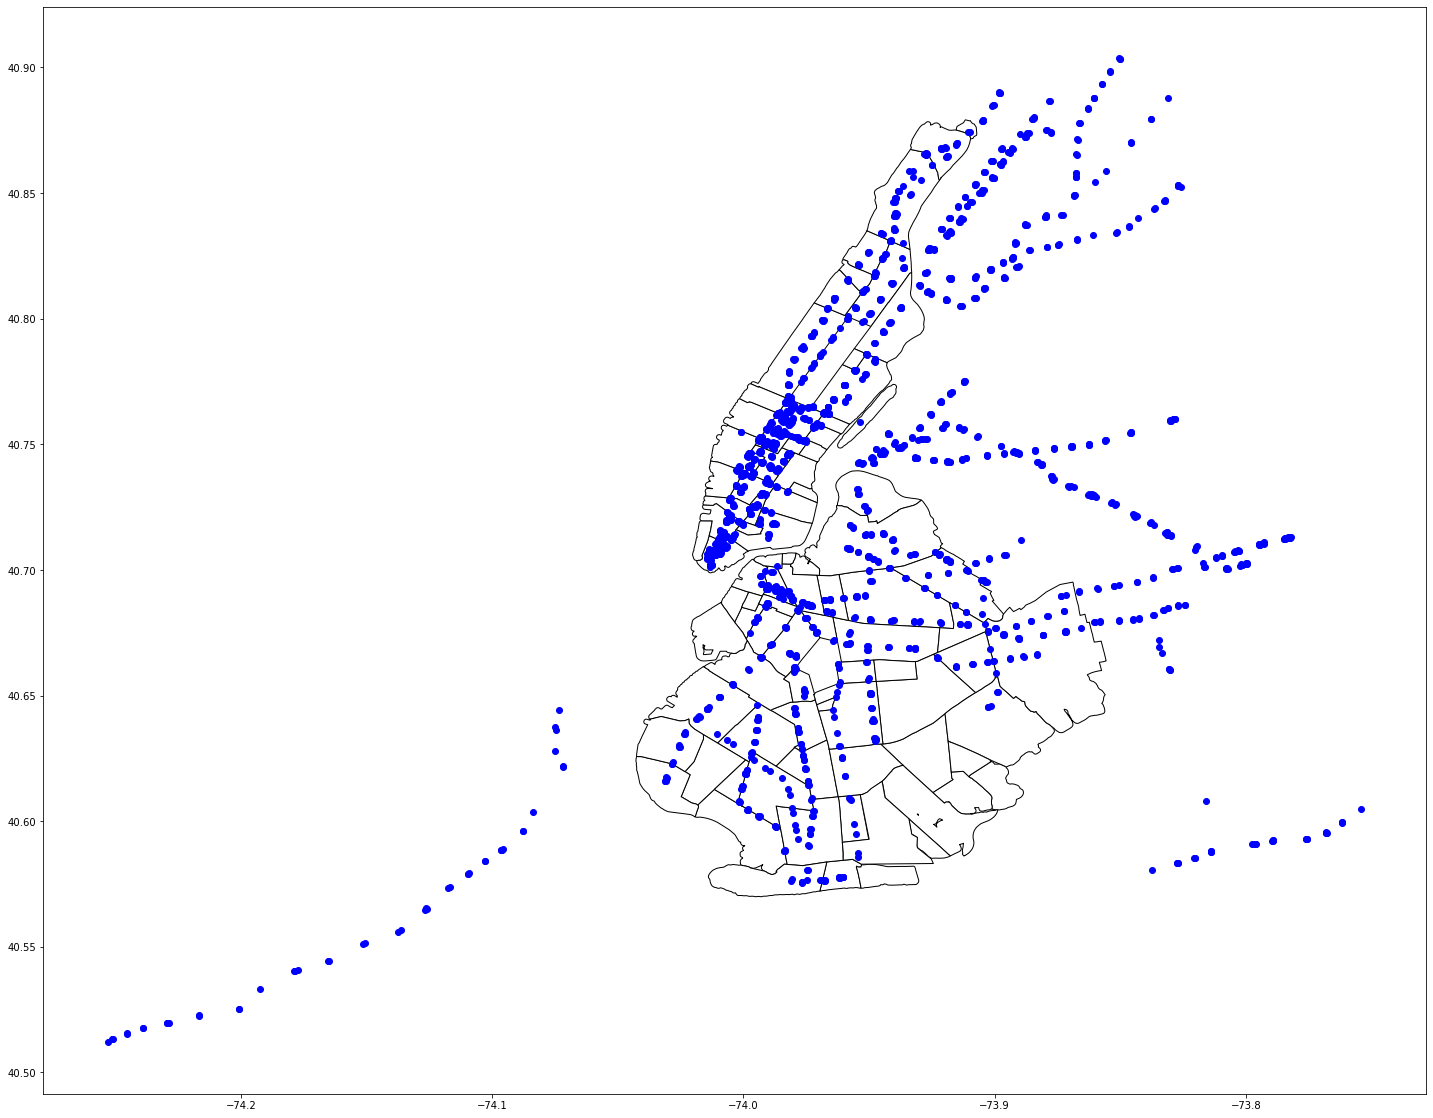

#### Neighborhood grocery store counts
Using Foursquare API, I explored the venues (limited to 150 venues) within each neighborhood shapefile. To use the Foursquare API, the geometry of neighborhood shapefile had to be simplified and converted into a string that would be recognized by the Foursquare API (see code in github for details). Here is a header of the venue data:

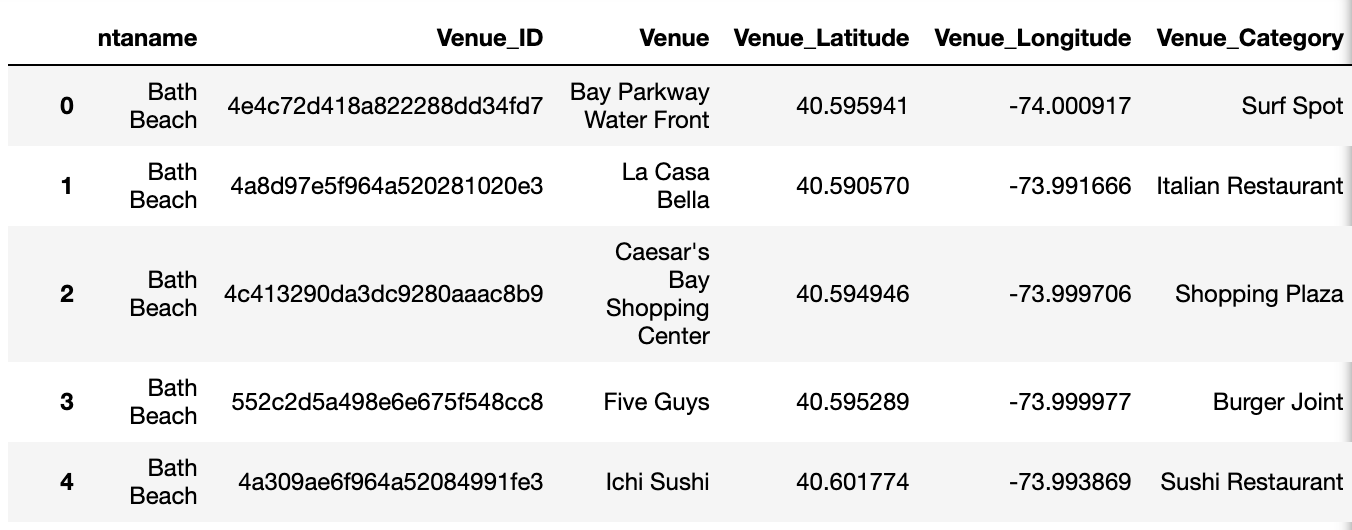

The dataset was filtered by the venue category to just grocery store related venues such as 'Grocery Store', 'Market', 'Organic grocery', 'Bakery', 'Butcher', 'Supermarket', 'Drugstore', and 'Pharmacy'. One hot encoding was used to obtain it as count data and the counts were then grouped by neighborhood. A final total count was calculated. Here is a header of the dataset with the number of grocery stores in each neighborhood:

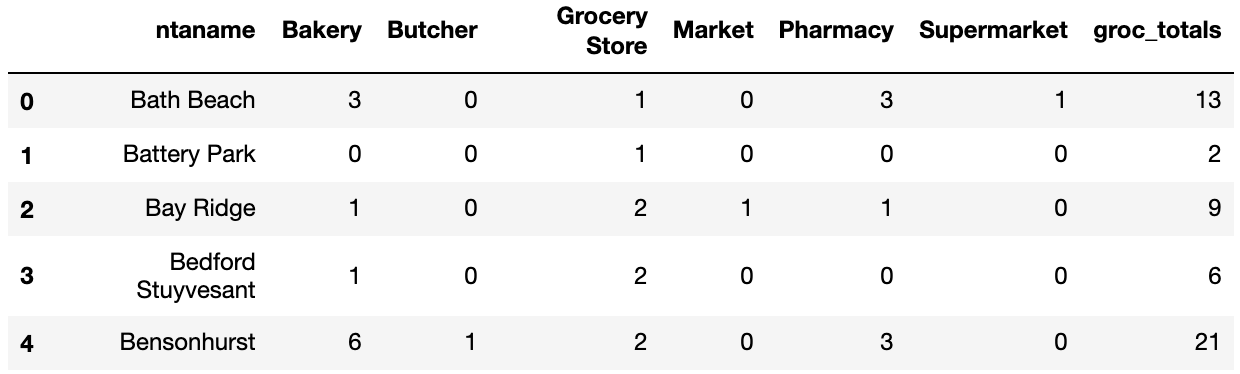

#### Neighborhood restaurant counts
The venue dataset was also filtered to venues that contain the word 'Restaurant'. One hot encoding was used again to obtain it as count data and grouped by neighborhood. A total count of restaurants was calculated.

#### Dataframe of neighborhood features

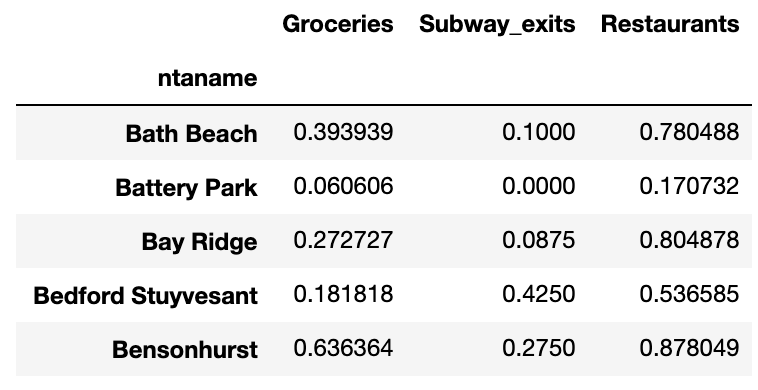

#### Neighborhood clustering method

Neighborhood feature counts were normalized for magnitude and K-means clustering was used to cluster into 4 clusters by the density of grocery stores, subway exits, and restaurants. The optimal cluster of 4 was determined by the elbow method and silhouette method.

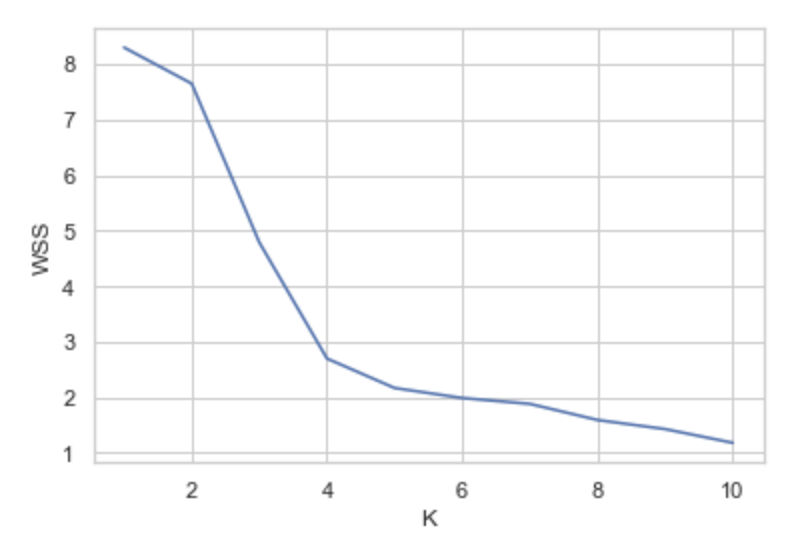
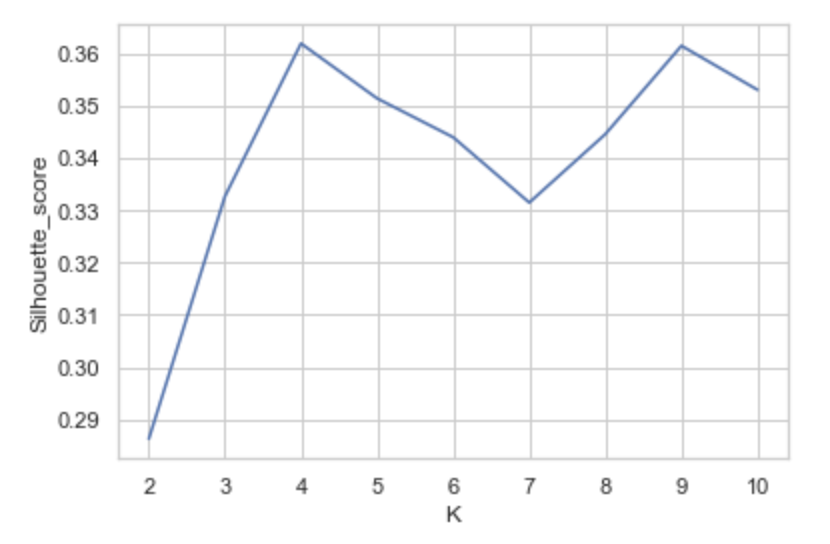

### Neighborhood rental prices:

Median rental asking prices for each neighborhood was downloaded from streeteasy. Year-on-year change was calculated from the the difference between the September median asking rent between 2018 and 2019. Neighborhood names were matched with existing neighborhood categories. Below is a header of the rental price data:

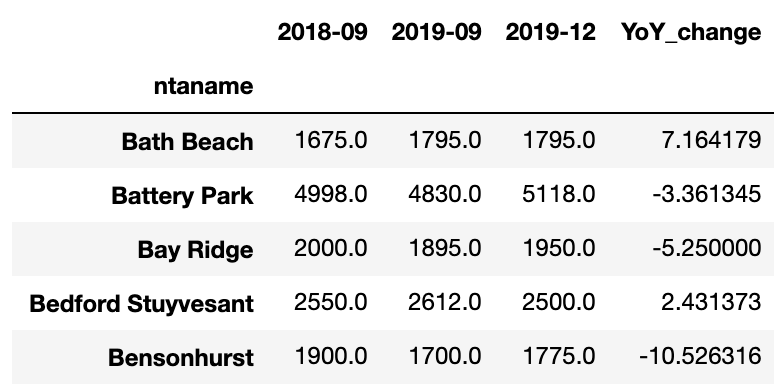

### Merged df
Final df of all parameters. Neighborhoods without any rental price data were dropped resulting in a final of 65 neighborhoods for data.

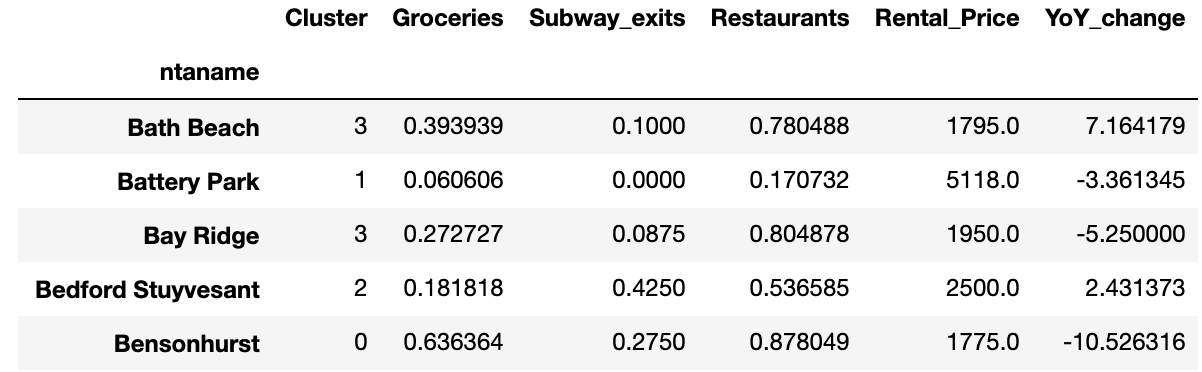

## Results

### Exploration of neighborhood clusters:

Map of neighborhood clusters

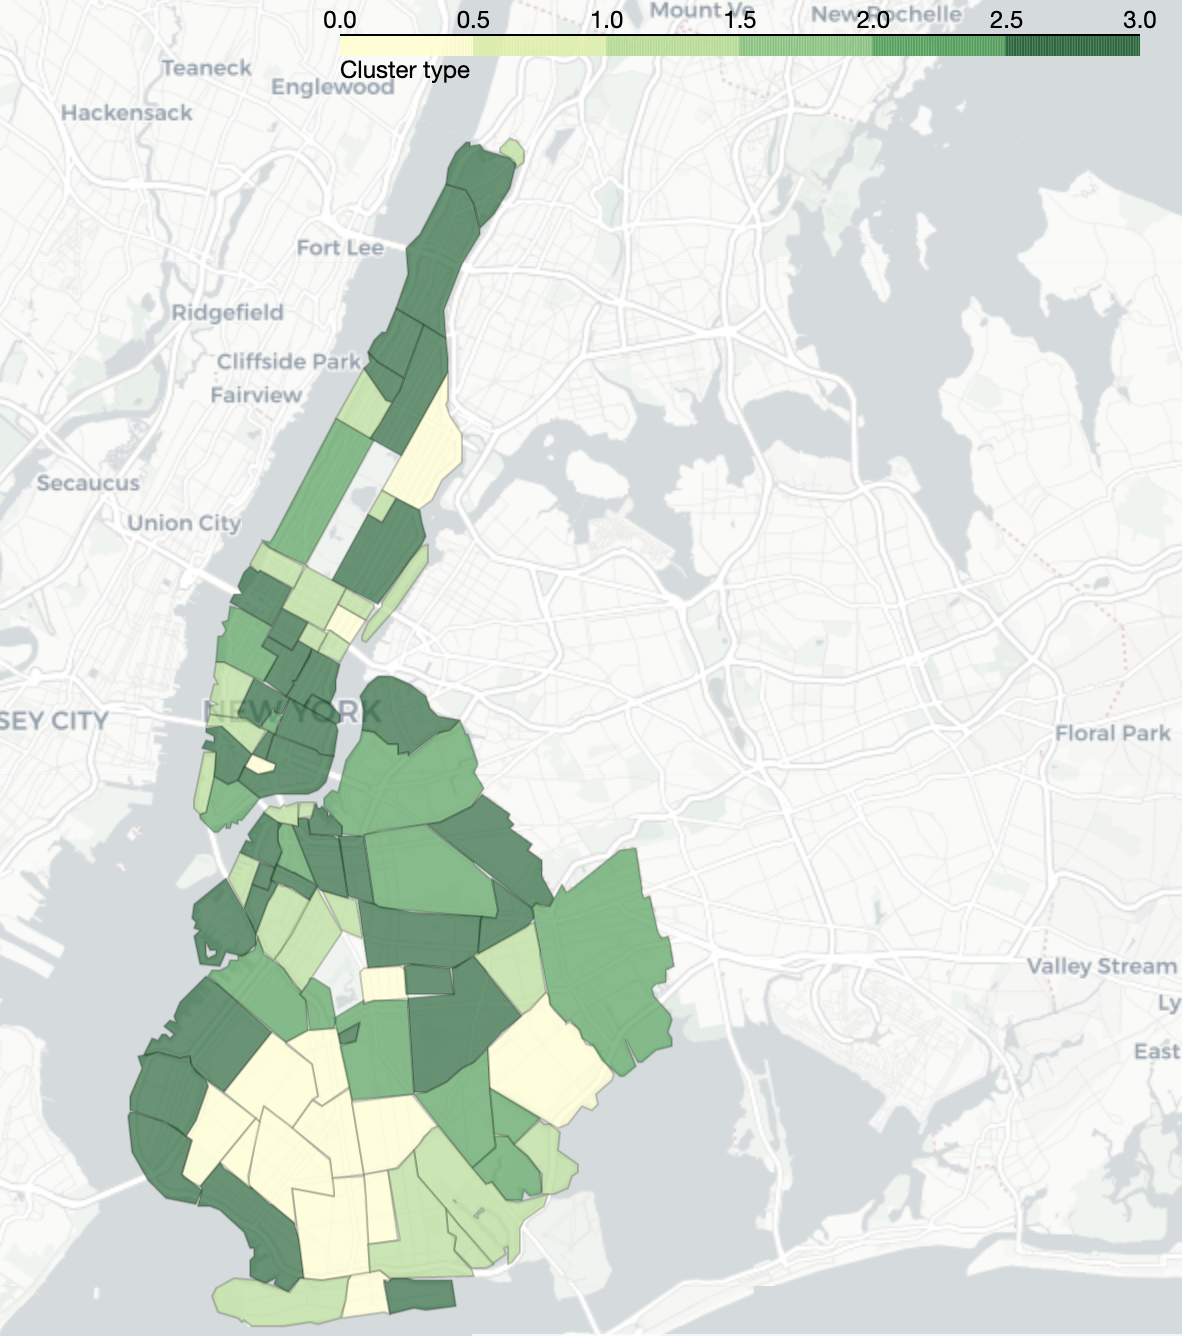

Summary characteristics:

| Cluster | Groceries| Subway  |Restaurants |
| ------- |:--------:| -------:|-----------:|
| 0       | High     | Low     | High       |
| 1       | Low-Med  |Very low | Low-Med    |
| 2       | Low-Med  |High     | Med-High   |
| 3       | Low-Med  |Low      | High       |


Rental price of the neighborhoods in each cluster:
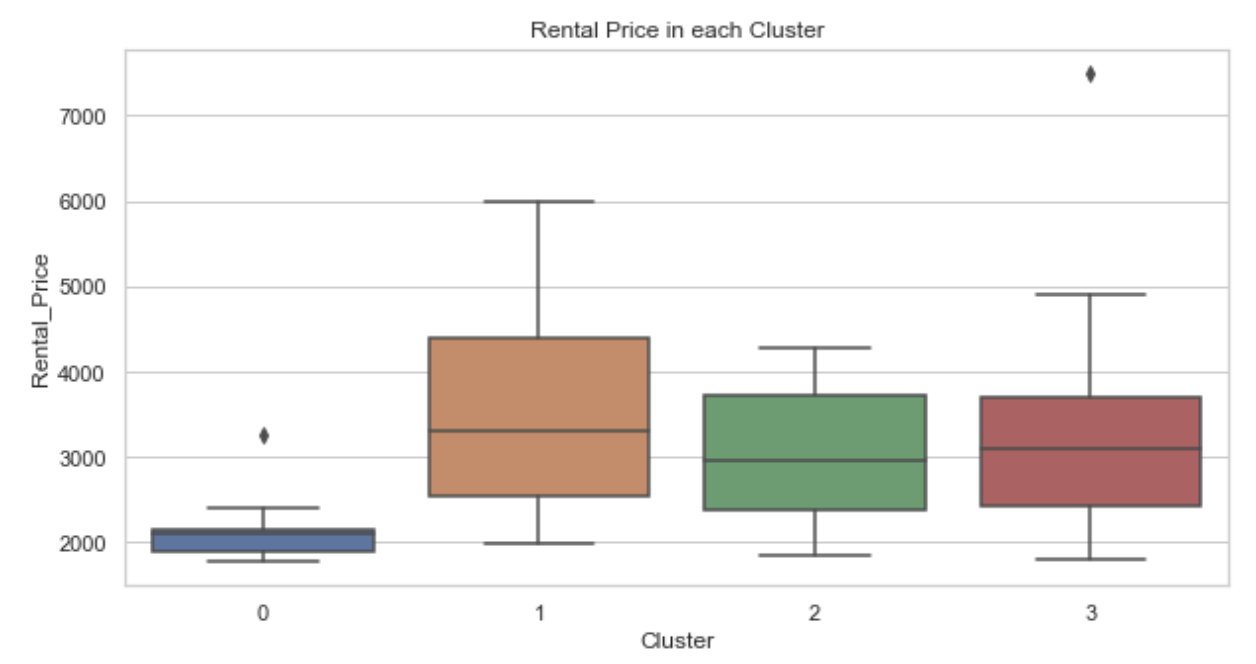

Year-on-year change of rental price of the neighborhoods in each cluster:
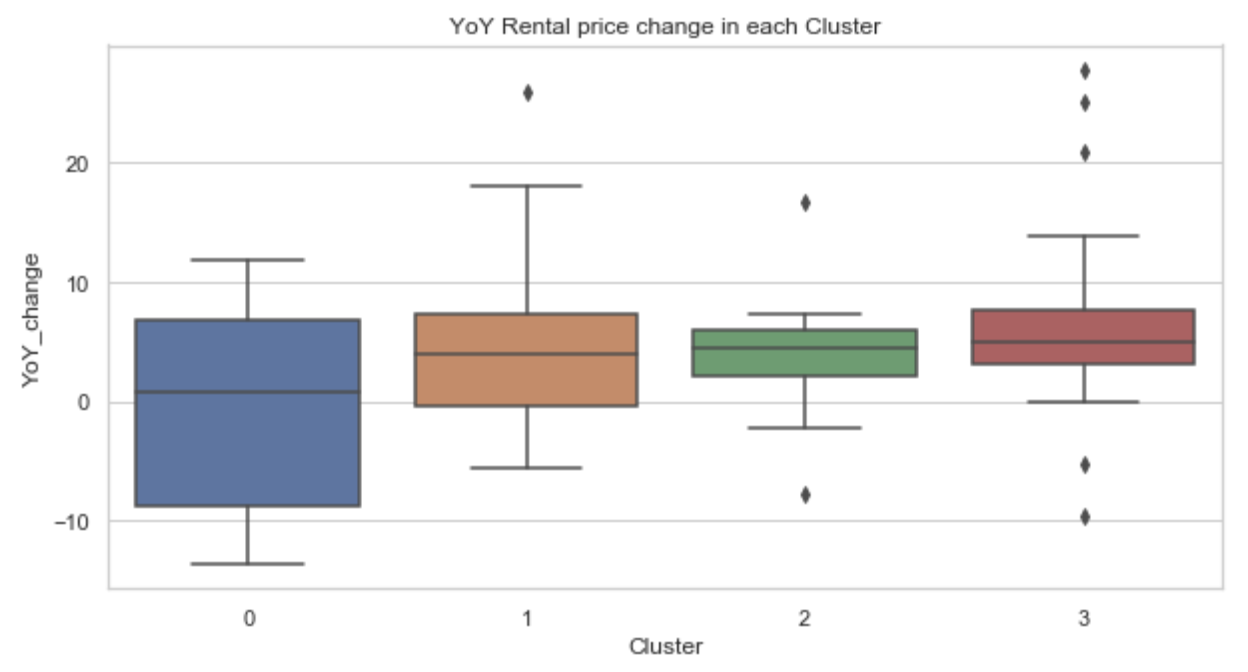

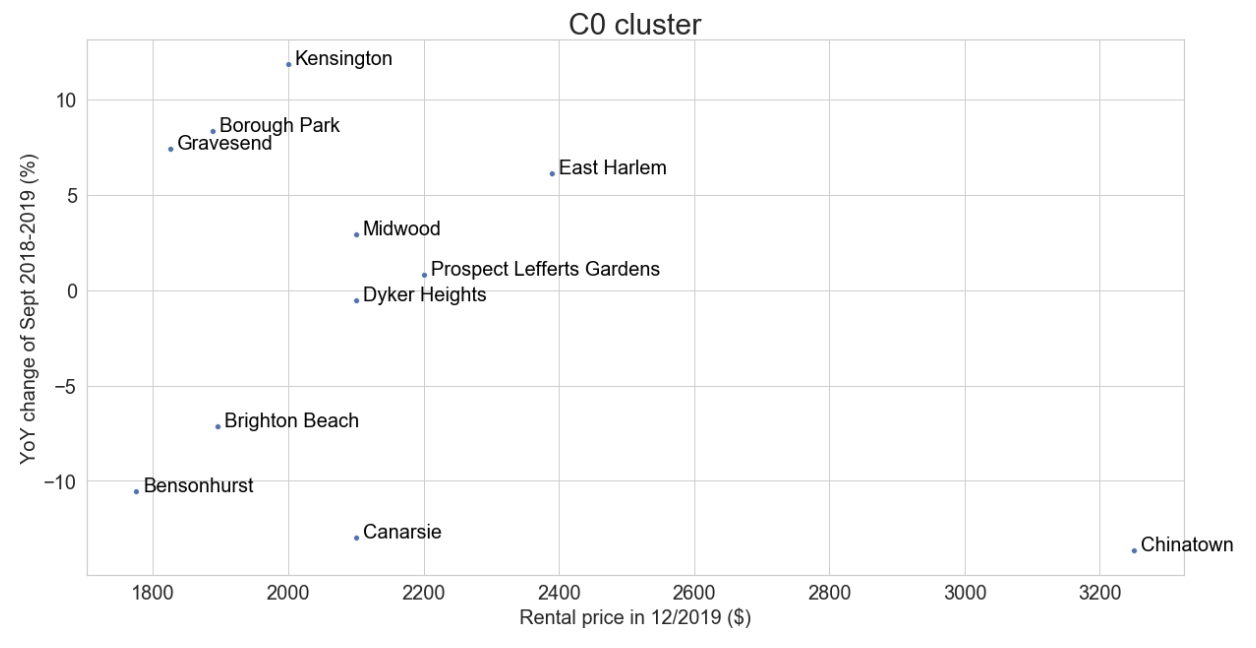
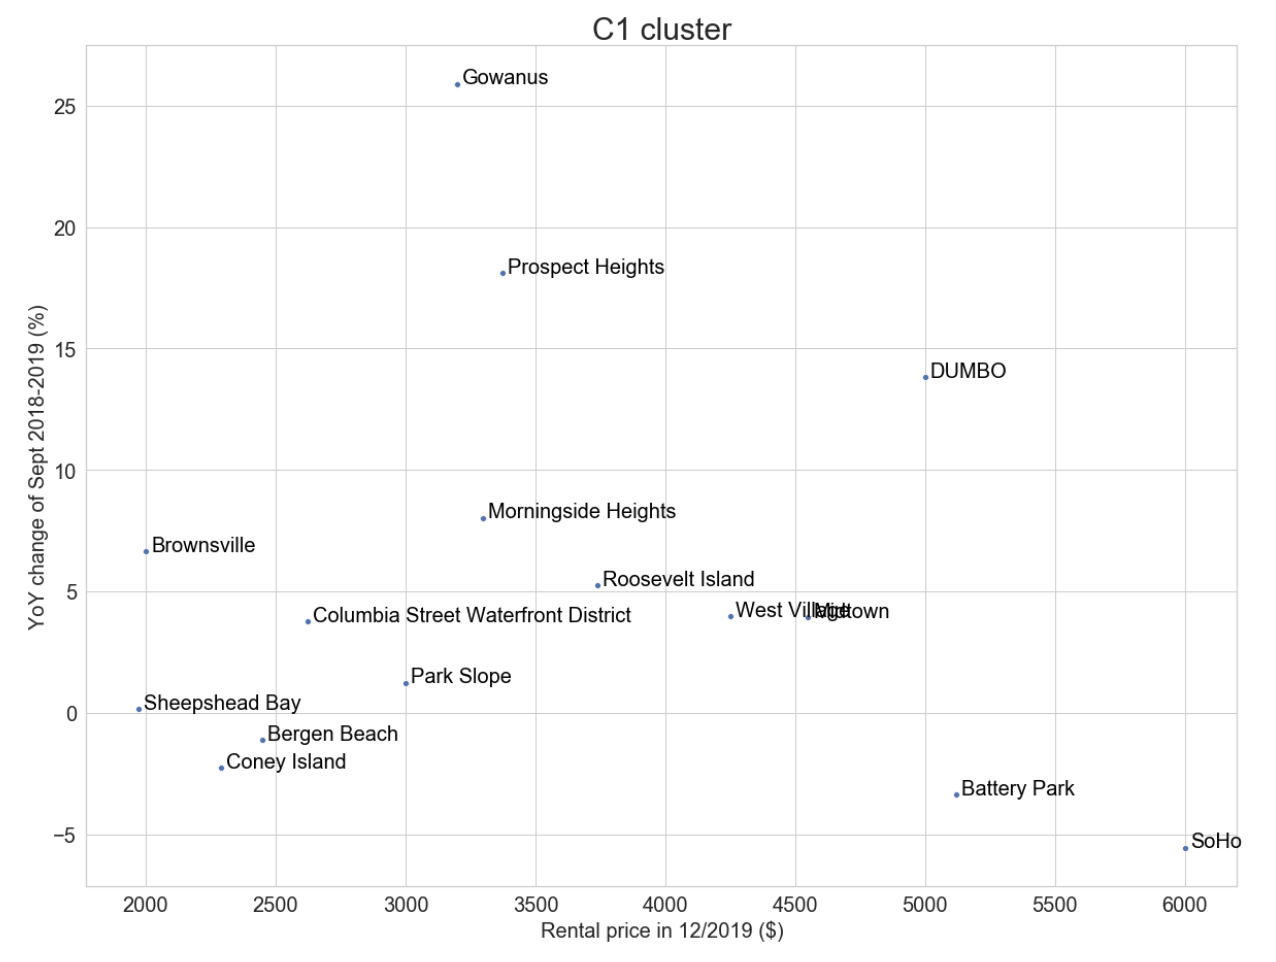
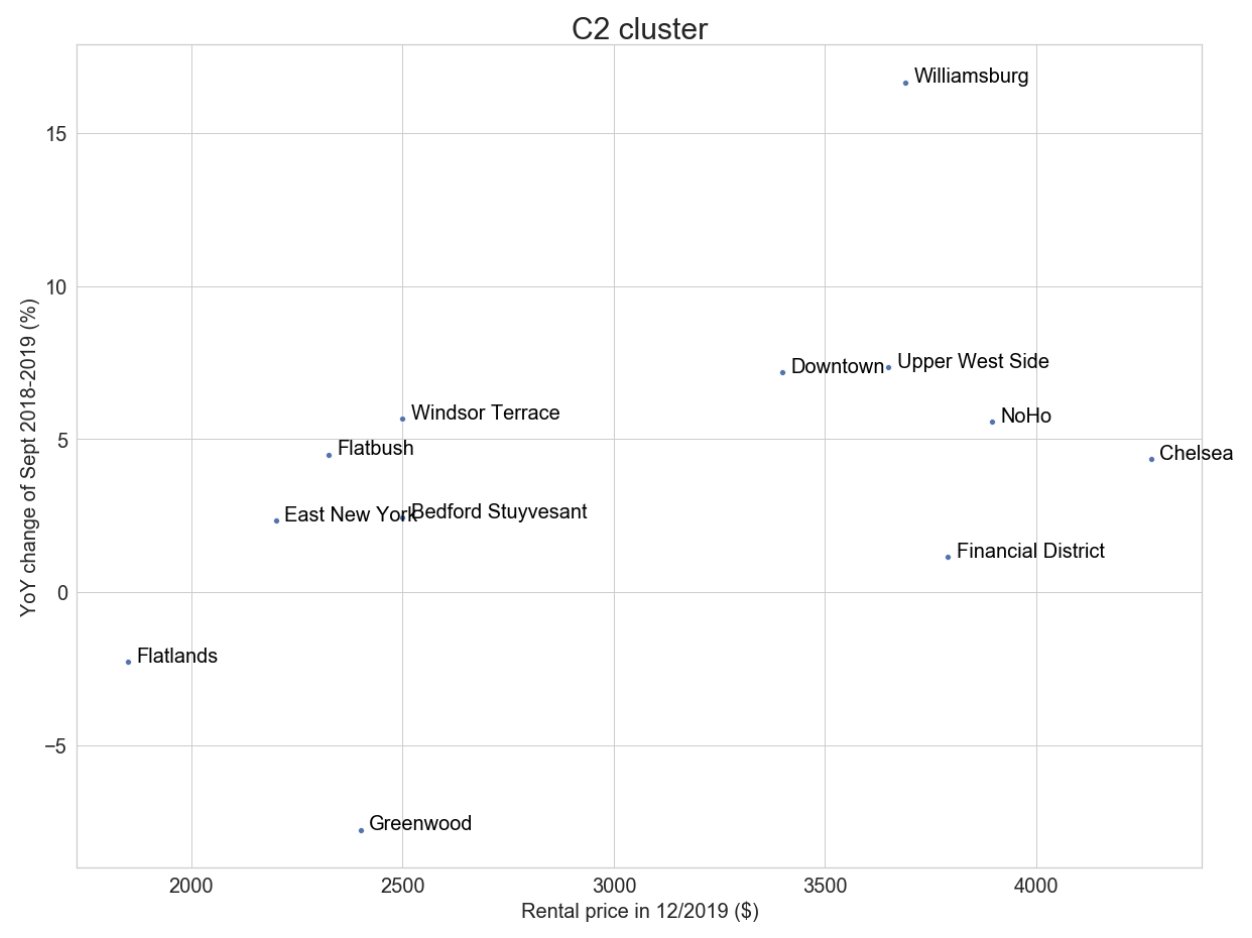
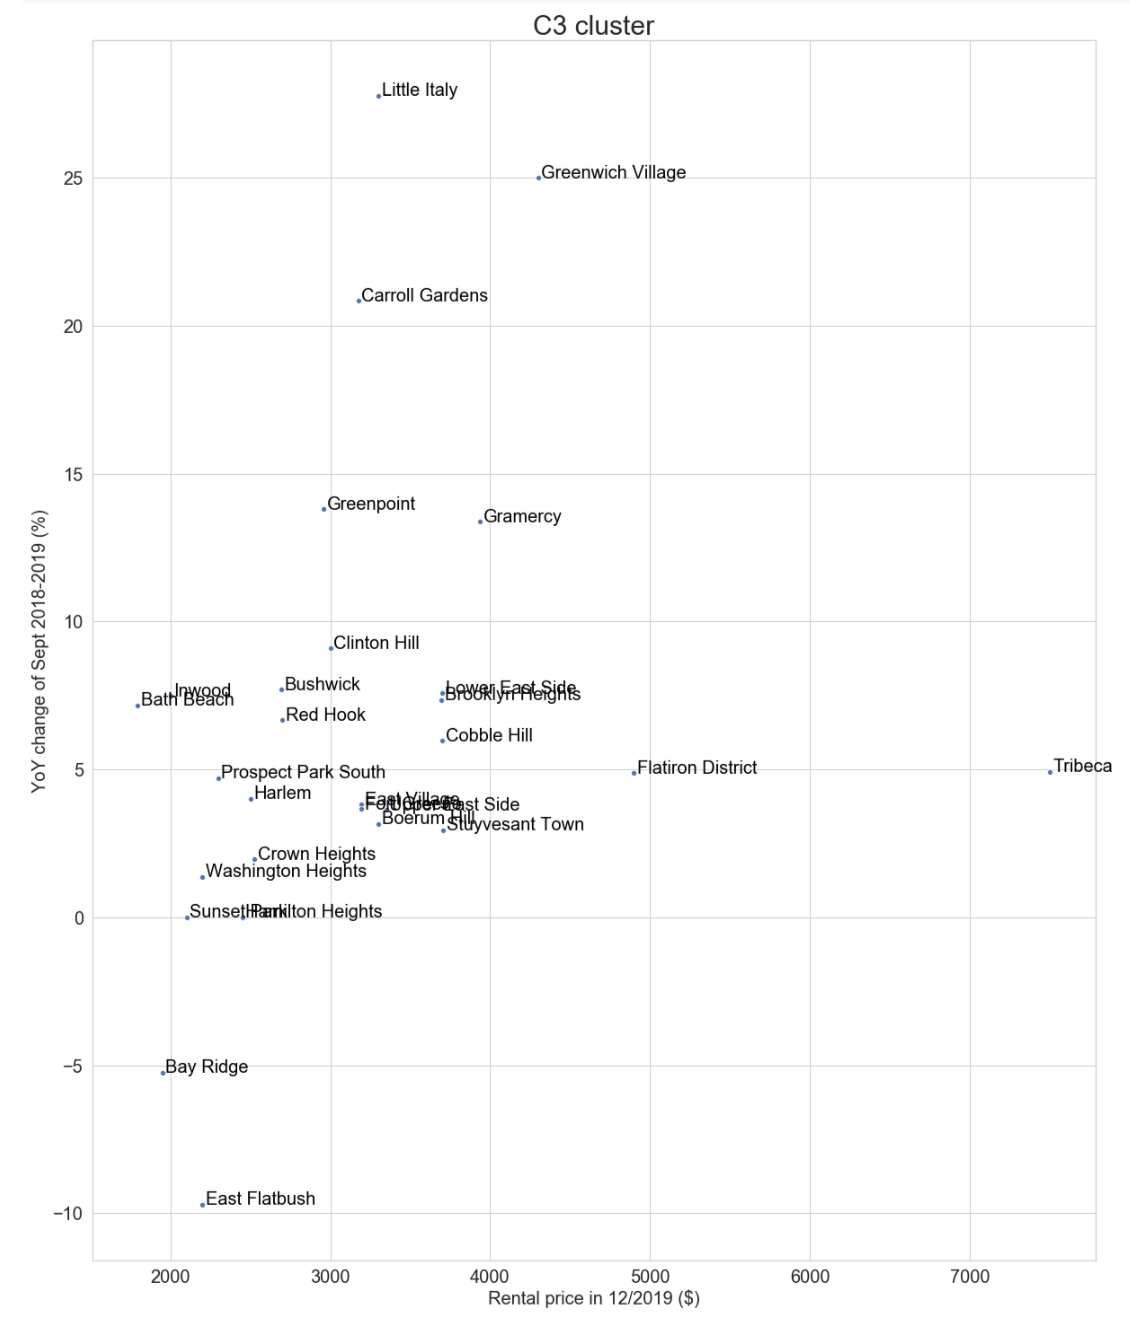



## Discussion

Using the features of number of grocery stores, subway exits, and restaurants in each neighborhood, the neighborhoods cluster into four groups. The characteristics of each clusters are show in the results section. Interestingly, most neighborhoods have  low-medium levels of grocery stores and very low to low accessibility by subway. Restaurant density is generally quite high.  

Depending on the type of neighborhood one would like to buy in, different neighborhoods stand out as good bets.

In cluster type 0 with high levels of grocery stores and restaurants with low subway access, the median rental price is generally lower than the other clusters, signifying that these were relatively cheaper places to live. Among these neighborhoods, Chinatown is likely overpriced for rent, while Kensington had good rental price growth this past year.

Cluster type 1 neighborhoods have low-medium levels of groceries and restaurants and very low subway accessibility. Compared to the other clusters, it appears as if these neighborhoods had the least amount of each of the features I identified. Gowanus has surprising amounts of growth in rental price and is likely a gentrifying neighborhood.

Cluster type 2 neighborhoods are characterized by high subway accessibility and med-high number of restaurants. Among these neighborhoods, Williamsburg has strong growth in rental price compared to neighborhoods of the same median rental price.

Cluster type 3 neighborhoods have a high number of restaurants and low subway accessibility. Most neighborhoods fall into this cluster. Little italy (Nolita), Greenwich Village, and Carroll Gardens all have strong rental price growth compared to similarly priced neighborhoods. 

## Conclusion

In conclusion, looking at just the number of grocery stores, subway entrances/exits, and restaurants, Manhattan and Brooklyn neighborhoods can be clustered into four types of neighborhoods. From each of these types of neighborhoods, we can identify a few neighborhoods that have much higher rental price growth compared to its similar neighborhoods with similar median rental price. These neighborhoods are likely good places to invest in for a rental property. 